In [5]:
from CustomObjects import *
! mkdir -p ../figures/Morey


In [6]:
Morey = pd.read_csv('../../00_RegionAnnotation/FC25_MES_Morey_2015.csv',index_col='Genes',
            usecols=['Genes','RPKM MES-shCTR'])
RNA = pd.read_csv('../data/matrices/RNA_FPKM_TSS_2500_FILT.csv',index_col='GENE')
RNA = RNA*2 # FPKMs-> RPKMs
comm_index = RNA.index.intersection(Morey.index)
len(comm_index)


88

In [8]:
Morey.index.difference(comm_index)

Index(['1500016L03Rik', '5730457N03Rik', 'Amd1', 'Cxx1c', 'Mir1983', 'Mir215',
       'Mir291b', 'Mir302b', 'Mir466i', 'Msx1as'],
      dtype='object')

In [9]:
RNA_PREFIXES = []
for CT in CT_LIST:
    RNA_PREFIXES.append('RNA_'+CT)

['RNA_ESC_1', 'RNA_ESC_2'] -> RNA_ESC COLUMNS 
['RNA_MES_1', 'RNA_MES_2'] -> RNA_MES COLUMNS 
['RNA_CP_1', 'RNA_CP_2'] -> RNA_CP COLUMNS 
['RNA_CM_1', 'RNA_CM_2'] -> RNA_CM COLUMNS 


<Figure size 216x72 with 0 Axes>

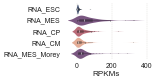

In [10]:
RNA_AVG = calculate_mean_features(RNA,RNA_PREFIXES).loc[comm_index]
Morey = Morey.loc[comm_index]
assert (Morey.index == RNA_AVG.index).all()
Morey.rename(columns={'RPKM MES-shCTR': 'RNA_MES_Morey'},inplace=True)
DF = pd.concat((RNA_AVG,Morey),axis=1)
violins(DF,COL_DICT=CT_COL_DICT,SAVEFIG='../figures/Morey/FPKM_distributions.png',X_LAB='RPKMs')

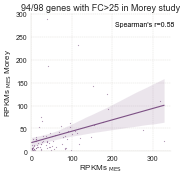

In [11]:
from scipy.stats import spearmanr
LOG_DF = np.log10(DF+1)
correlation, _ = spearmanr(DF['RNA_MES'], DF['RNA_MES_Morey'])
plt.figure(figsize=(5, 5))
sns.regplot(data=DF,x='RNA_MES', y='RNA_MES_Morey', scatter=True, label='Fit Line', color=CT_COL_DICT['MES'],
            scatter_kws={'alpha':0.5, 's':2})
plt.text(0.6, 0.9, f'Spearman\'s r={correlation:.2f}', transform=plt.gca().transAxes, color='black')
plt.xlim(left=0)
plt.ylim(bottom=0)
# Adding labels and title
plt.xlabel(f"RPKMs {subscript_get('MES')}")
plt.ylabel(f"RPKMs {subscript_get('MES')} Morey")
plt.title('94/98 genes with FC>25 in Morey study')
sns.despine()
plt.savefig('../figures/Morey/correlations_scatter.png', format="png", bbox_inches="tight");


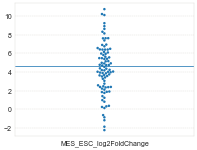

In [12]:
RNA_STATS = pd.read_csv('../data/matrices/RNAFC.csv',index_col='GENE').filter(regex='MES_ESC_log2FoldChange').loc[comm_index]
sns.swarmplot(RNA_STATS,)
plt.axhline(np.log2(25))

In [13]:
ESC_MES_FC25_Morey = {'ESC_MES_FC25_Morey': list(comm_index)}
! mkdir -p ../data/Morey
with open(f'../data/Morey/ESC_MES_FC25_Morey.pkl', 'wb') as f:
        pickle.dump(ESC_MES_FC25_Morey, f)

## All gene correlation

In [14]:

Morey_all = pd.read_csv('../../00_RegionAnnotation/RNAseq_ESC_MES_Morey2015.txt',index_col='Genes',
            names=['Genes','RNA_ESC_Morey','RNA_MES_Morey'], sep='\s+')
RNA_all = pd.read_csv('../data/matrices/RNA_FPKM_TSS_2500_FILT.csv',index_col='GENE')
RNA_all = RNA_all*2 # FPKMs-> RPKMs 
comm_index_all = Morey_all.index.intersection(RNA_all.index)


RNA_AVG_all = calculate_mean_features(RNA_all,RNA_PREFIXES).loc[comm_index_all]
RNA_AVG_all

['RNA_ESC_1', 'RNA_ESC_2'] -> RNA_ESC COLUMNS 
['RNA_MES_1', 'RNA_MES_2'] -> RNA_MES COLUMNS 
['RNA_CP_1', 'RNA_CP_2'] -> RNA_CP COLUMNS 
['RNA_CM_1', 'RNA_CM_2'] -> RNA_CM COLUMNS 


,RNA_ESC,RNA_MES,RNA_CP,RNA_CM
0610005C13Rik,4.675723,2.480110,4.454108,2.594468
0610010F05Rik,6.101688,5.599243,5.764052,4.172894
0610010K14Rik,104.868369,132.886236,89.119288,74.054064
0610012G03Rik,35.651919,51.348278,45.976260,98.704322
0610030E20Rik,5.711212,12.355940,10.807232,15.083958
...,...,...,...,...
Zyg11b,8.853979,22.073950,13.640235,14.958489
Zyx,28.557080,58.089263,72.877106,84.940064
Zzef1,8.556672,6.426618,8.492610,13.041848
Zzz3,19.913717,24.465014,24.700033,16.052697


<Figure size 216x86.4 with 0 Axes>

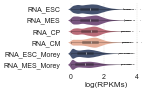

In [15]:

Morey_all = Morey_all.loc[comm_index_all]

assert (Morey_all.index == RNA_AVG_all.index).all()
DF_all = pd.concat((RNA_AVG_all,Morey_all),axis=1)
LOG_DF_all = np.log10(DF_all+1)
violins(LOG_DF_all,COL_DICT=CT_COL_DICT,SAVEFIG='../figures/Morey/FPKM_distributions_all.png', X_LAB='log(RPKMs)')


In [16]:
LOG_DF_all = LOG_DF_all.filter(regex='MES')
LOG_DF_all= LOG_DF_all[(LOG_DF_all > 1).sum(axis=1) > 0]
LOG_DF_all

,RNA_MES,RNA_MES_Morey
0610010K14Rik,2.126736,1.890846
0610012G03Rik,1.718902,1.174528
0610030E20Rik,1.125674,0.852886
1110002L01Rik,0.890890,1.178873
1110004F10Rik,2.207094,2.055604
...,...,...
Zwilch,1.445615,1.354953
Zwint,1.927307,1.590972
Zyg11b,1.363122,1.142064
Zyx,1.771509,1.760471


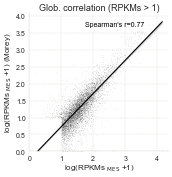

In [17]:
correlation, _ = spearmanr(LOG_DF_all['RNA_MES'], LOG_DF_all['RNA_MES_Morey'])
plt.figure(figsize=(5, 5))
sns.regplot(data=LOG_DF_all, x='RNA_MES', y='RNA_MES_Morey', scatter=True, label='Fit Line', color='black', 
            scatter_kws={'alpha':0.05, 's':1}) # type: ignore
plt.text(0.4, 0.9, f'Spearman\'s r={correlation:.2f}', transform=plt.gca().transAxes, color='black')
plt.xlim(left=0)
plt.ylim(bottom=0)
# Adding labels and title
plt.xlabel(f"log(RPKMs {subscript_get('MES')} +1)")
plt.ylabel(f"log(RPKMs {subscript_get('MES')} +1) (Morey)")
plt.title('Glob. correlation (RPKMs > 1)')
sns.despine()
plt.savefig('../figures/Morey/correlations_scatter_all.png', format="png", bbox_inches="tight");
